In [3]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import *
from sklearn.preprocessing import normalize as N
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv(r"C:\Users\mvsan\Downloads\bike_sharing.csv")

In [5]:
# checks for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checks for duplicate values
data.duplicated().sum()

0

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
data = data[['registered','cnt']]

<AxesSubplot:>

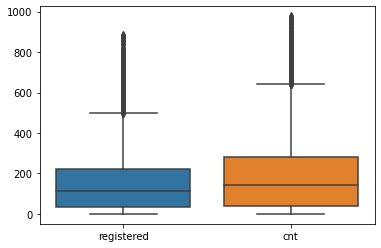

In [12]:
sb.boxplot(data=data)

C:\Users\mvsan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

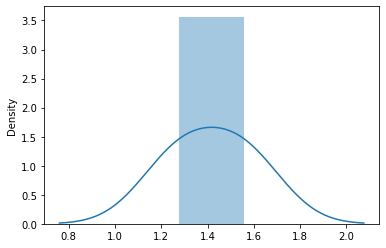

In [14]:
# display skewness of dataframe
target=data.skew()
sb.distplot(target)

In [16]:
# splitting data into train & test dataset
train,test=train_test_split(data,test_size=0.2)

In [17]:
print("train",train.shape)
print("test",test.shape)

train (13903, 2)
test (3476, 2)


In [19]:
# separating features and labels of training dataset
x_train=data.iloc[:,:-1].values
y_train=data.iloc[:,1].values

In [20]:
# fitting simple linear regression model to the training dataset
# lin_reg = LinearRegression(normalize=True)  
# lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression()

In [21]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_train))
pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})

,Actual,Predicted
0,16,14.918540
1,40,37.585128
2,32,31.517744
3,13,11.442304
4,1,1.200116
...,...,...
17374,119,135.907885
17375,89,100.002029
17376,90,102.636212
17377,61,57.431073


Accuracy of train data = 95.30278280651294


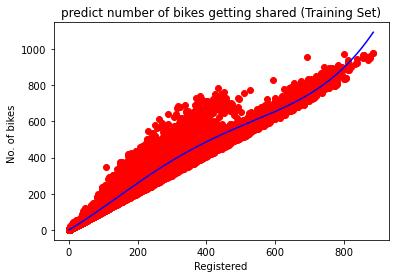

In [28]:
class PolynomialRegression:
    
    def fit_model(self,x_train,y_train):        
        # getting prediction values on train dataset
        y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train))
        
        return y_pred_train
    
    def fit_model_cv(self,x_cv):
        # getting prediction values cross validation dataset 
        y_pred=lin_reg2.predict(poly_reg.fit_transform(x_cv))
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize_trainset(self,y_pred_train):
        # visualizing the training set result
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('Registered')
        plt.ylabel('No. of bikes ')
        plt.show()
        
    
        
def main():
    # creates class object 
    obj = PolynomialRegression()
    y_pred_train = obj.fit_model(x_train,y_train)  
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    obj.visualize_trainset(y_pred_train)
    
    
if __name__ == '__main__':
    main()